In [1]:
! wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1f09CkI3Hd7h6VdwAOhAaja5G_HwtPBZZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1f09CkI3Hd7h6VdwAOhAaja5G_HwtPBZZ" -O weight_height.csv && rm -rf ~/cookies.txt

--2022-05-14 01:06:53--  https://docs.google.com/uc?export=download&confirm=&id=1f09CkI3Hd7h6VdwAOhAaja5G_HwtPBZZ
Resolving docs.google.com (docs.google.com)... 74.125.204.101, 74.125.204.113, 74.125.204.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.204.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vo71cjuleq90l7bdotlde3jnf9ffbgcd/1652490375000/00253795494504996225/*/1f09CkI3Hd7h6VdwAOhAaja5G_HwtPBZZ?e=download [following]
--2022-05-14 01:06:54--  https://doc-10-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vo71cjuleq90l7bdotlde3jnf9ffbgcd/1652490375000/00253795494504996225/*/1f09CkI3Hd7h6VdwAOhAaja5G_HwtPBZZ?e=download
Resolving doc-10-8k-docs.googleusercontent.com (doc-10-8k-docs.googleusercontent.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to doc-10-8k-docs.googleusercontent.com (doc-10-8k-d

In [2]:
import pandas as pd

df = pd.read_csv("./weight_height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


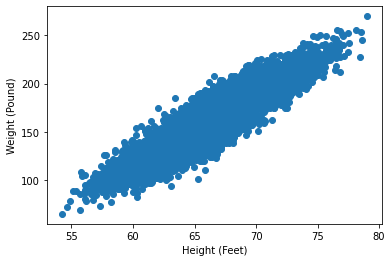

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df.Height, df.Weight)
plt.xlabel('Height (Feet)')
plt.ylabel('Weight (Pound)')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X, y = df.Height.values, df.Weight.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
X_train.shape, X_test.shape # X의 경우 (데이터의 크기, 피처의 개수) 의 형태로 shape이 구성되어야 한다.
# 그러나, 데이터는 현재 (8000, )으로 피처의 개수(1개)가 없는 데이터이다.

((8000,), (2000,))

In [7]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
print(f"MSE: {mse:.2f}")

MSE: 141.91


In [12]:
W = lr.coef_
b = lr.intercept_

x1 = df.Height.min() - 3
x2 = df.Height.max() + 3
y1 = W * x1 + b
y2 = W * x2 + b

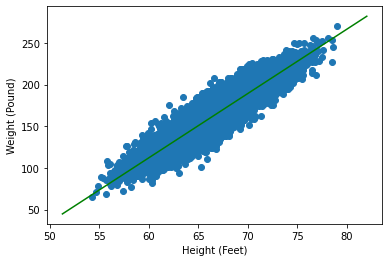

In [13]:
import matplotlib.pyplot as plt

plt.scatter(df.Height, df.Weight)
plt.plot([x1, x2], [y1, y2], color="Green", label="Female Line")

plt.xlabel('Height (Feet)')
plt.ylabel('Weight (Pound)')
plt.show()

## (추가) 젠더 특성을 고려하기

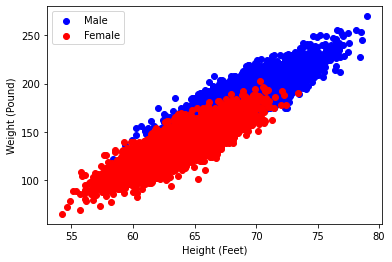

In [ ]:
import matplotlib.pyplot as plt

male_df = df[df.Gender == "Male"]
female_df = df[df.Gender == "Female"]

plt.scatter(male_df.Height, male_df.Weight, color= "Blue", label="Male")
plt.scatter(female_df.Height, female_df.Weight, color= "Red", label="Female")
plt.xlabel('Height (Feet)')
plt.ylabel('Weight (Pound)')
plt.legend()
plt.show()

## Model Engineering
* 단순하게 모든 데이터를 다 활용해줄 수도 있지만, 데이터 분포를 보면, 남자와 여자의 분포가 다른 것을 확인할 수 있다.
* 이런 데이터의 특성을 반영한 인공지능 모델을 개발하는 것이 좋다.
* 키가 주어졌을 때, 몸무게를 예측하는 인공지능 모델을 개발해보자.

In [ ]:
from sklearn.model_selection import train_test_split

X_male, y_male = male_df.Height.values, male_df.Weight.values
X_male_train, X_male_test, y_male_train, y_male_test = \
train_test_split(X_male, y_male, test_size=0.2, random_state=1)

X_male_train = X_male_train.reshape(-1,1)
X_male_test = X_male_test.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

X_female, y_female = female_df.Height.values, female_df.Weight.values
X_female_train, X_female_test, y_female_train, y_female_test = \
train_test_split(X_female, y_female, test_size=0.2, random_state=1)

X_female_train = X_female_train.reshape(-1,1)
X_female_test = X_female_test.reshape(-1,1)

In [ ]:
lr_male = LinearRegression()
lr_male.fit(X_male_train, y_male_train)

LinearRegression()

In [ ]:
lr_female = LinearRegression()
lr_female.fit(X_female_train, y_female_train)

LinearRegression()

In [ ]:
pred_male = lr_male.predict(X_male_test)
mse_male = mean_squared_error(y_male_test, pred_male)
print(f"MSE male: {mse_male:.2f}")

MSE male: 108.91


In [ ]:
pred_female = lr_female.predict(X_female_test)
mse_female = mean_squared_error(y_female_test, pred_female)
print(f"MSE female: {mse_female:.2f}")

MSE female: 108.41


## Conclusion
* Gender를 고려하지 않을 경우: 141.91
* 고려했을 경우: 108.91(Male), 108.41(Female)

* 데이터의 특징을 잘 고려한 모델이 더 좋은 성능을 확보할 수 있다.

## 결과 시각화

In [ ]:
w_m, w_f = lr_male.coef_, lr_female.coef_
b_m, b_f = lr_male.intercept_, lr_female.intercept_

x1_m = male_df.Height.min() - 10
x2_m = male_df.Height.max() + 10
y1_m = w_m * x1_m + b_m
y2_m = w_m * x2_m + b_m

x1_f = female_df.Height.min() - 10
x2_f = female_df.Height.max() + 10
y1_f = w_f * x1_f + b_f
y2_f = w_f * x2_f + b_f

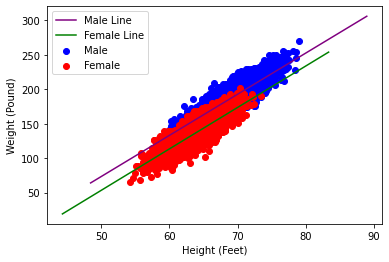

In [ ]:
import matplotlib.pyplot as plt

male_df = df[df.Gender == "Male"]
female_df = df[df.Gender == "Female"]

plt.scatter(male_df.Height, male_df.Weight, color= "Blue", label="Male")
plt.scatter(female_df.Height, female_df.Weight, color= "Red", label="Female")

plt.plot([x1_m, x2_m], [y1_m, y2_m], color="Purple", label="Male Line")
plt.plot([x1_f, x2_f], [y1_f, y2_f], color="Green", label="Female Line")
plt.xlabel('Height (Feet)')
plt.ylabel('Weight (Pound)')
plt.legend()
plt.show()